In [1]:
import pandas as pd
import numpy as np

In [2]:
def load(file):
    """Load the experiment data from a CSV file"""
    
    schema = {
        'First': np.int64(),
        'Last': np.int64(),
        'Parse': np.float64(),
        'Resize': np.float64(),
        'Serialize': np.float64(),
        'Pop': np.float64(),
    }
    
    df = pd.read_csv(file, dtype=schema)
    df.file = file

    return df

In [3]:
import os

def get_meta(path):
    """Returns (threads, num_jsons, repeats)"""
    props = os.path.splitext(os.path.basename(file))[0].split('_')
    return (int(props[1][1:]), int(props[2][1:]), int(props[3][1:]))

def analyze(df):
    """Analyze the experiment data, deriving various metrics."""
    
    df['Total'] = df['Parse'] + df['Resize'] + df['Serialize'] + df['Pop']
    df.threads, df.jsons, df.repeats = get_meta(df.file)
        
    return df

In [4]:
def summarize(df):
    """Summarize the data from all threads into one row."""
    
    row = {'Threads': df.threads,
           'JSONs': df.jsons,
           'Parse': df['Parse'].mean(),
           'Resize': df['Resize'].mean(),
           'Serialize': df['Serialize'].mean(),
           'Pop': df['Pop'].mean(),
           'Total': df['Total'].mean()}
              
    return row;

In [5]:
import glob

csv_files = []
for file in glob.glob("../experiments/data/latency/threads/latency/cpu/*.csv"):
    csv_files.append(file)

records = []
for file in csv_files:
    records.append(summarize(analyze(load(file))))


In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
import math
import pint

plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": ["Palatino"],
    "font.size": 14
})
    
df = pd.DataFrame.from_records(records).sort_values(by=['Threads', 'JSONs']).set_index('Threads')

display(df)

num_jsons = df.JSONs.unique()
num_jsons.sort()

rows = 3
cols = int(math.ceil(len(num_jsons)/rows))

ymax = df['Total'].max()


,JSONs,Parse,Resize,Serialize,Pop,Total
Threads,,,,,,
1,1,2.409545e+06,6585.00000,123137.00000,23034.000000,2.562301e+06
1,2,2.728420e+06,7068.00000,112775.00000,3332.000000,2.851595e+06
1,4,2.814230e+06,8614.00000,140972.00000,25972.000000,2.989788e+06
1,8,3.864577e+06,7850.00000,113210.00000,11509.000000,3.997146e+06
1,16,3.458724e+06,8657.00000,153843.00000,6128.000000,3.627352e+06
...,...,...,...,...,...,...
32,32768,3.882782e+07,1765.34375,245096.03125,78911.656250,3.915359e+07
32,65536,3.814004e+07,19808.50000,134440.15625,93892.937500,3.838818e+07
32,131072,5.034582e+07,24400.65625,339784.31250,63297.625000,5.077331e+07


In [7]:
#fig, axs = plt.subplots(nrows=rows, ncols=cols, figsize=[10, 10])

#for i, n in enumerate(num_jsons):
    #units = pint.UnitRegistry()
    #row = int(i / cols)
    #col = i % cols
    #ax = axs[row][col]
        
    #subdf = df[df.JSONs == n]
    #del subdf['JSONs']
    #sns.scatterplot(ax=ax, data=subdf, legend=None)
    #axs[row][col].set_ylim([1e2, ymax])
    #axs[row][col].set_yscale('log')
    #ax.annotate(str(n), xycoords='axes fraction', xy=(0.1, 0.9))
    #labels = ['${:~L}$'.format(x) for x in (np.around(ax.get_yticks() * 1e-6, 2) * units.milliseconds)]
    #ax.set_yticklabels(labels)
    #ax.set_xlabel(None)

#fig.tight_layout()

511

511

511

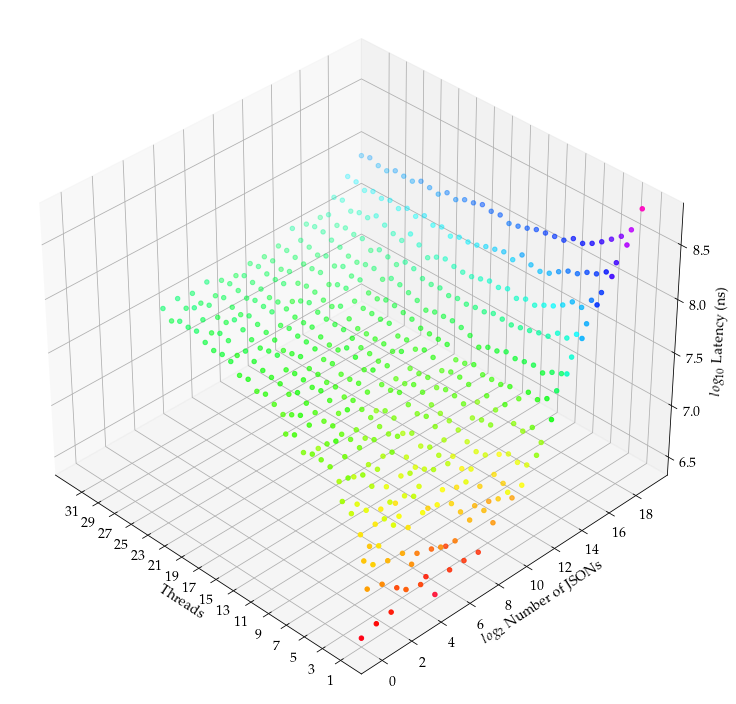

In [134]:
from mpl_toolkits.mplot3d import Axes3D
import cmasher as cmr

plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": ["Palatino"],
    "font.size": 14
})

fig, ax = plt.subplots(subplot_kw={"projection": "3d"}, figsize=(10, 10))

threads = df.index.unique().to_numpy()
jsons = df.JSONs.unique()

xs = df.index.to_numpy()
ys = np.log2(df.JSONs.to_numpy())
zs = np.log10(df.Total.to_numpy())

bottom = zs.min()
top = zs.max()

display(len(xs))
display(len(ys))
display(len(zs))

cmap = plt.get_cmap('gist_rainbow')
colors = list(map(lambda x: cmap(round((x - bottom)/(top - bottom) * 255)), zs))

#ax.bar3d(x=xs, y=ys, z=bottom, dx=1, dy=1, dz=zs-bottom, color=colors, zsort='max')
ax.scatter(xs=xs, ys=ys, zs=zs, c=colors)

#for i in range(0, len(xs)):
    #ax.line3d([xs[i], xs[i]], [ys[i], ys[i]], [bottom, zs[i]], marker=[None, 'o'])

ax.set_zlim(bottom, top)
ax.set_xticks(range(min(xs),max(xs)+1,2))
ax.set_yticks(range(round(min(ys)),round(max(ys))+1,2))

ax.set_ylabel('$log_{2}$ Number of JSONs')
ax.set_xlabel('Threads')
ax.set_zlabel('$log_{10}$ Latency (ns)')

ax.view_init(35.264, -45)

ax.invert_xaxis()

plt.tight_layout()